# Homework 5
Noah Kim Section AC

In [31]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import pickle as pkl
plt.rcParams["figure.figsize"] = (10,6)

### Problem 1

In [32]:
bkgd = stats.norm.rvs(loc=0,scale = 2, size = 1000000)
signal = stats.uniform.rvs(loc=0,scale=20,size=1000000)

Text(0.5, 0, 'Observed data, $P(d|s)$')

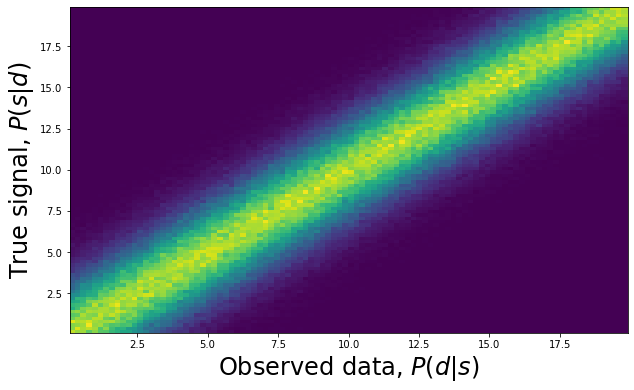

In [33]:
data = bkgd + signal

signaledges = np.linspace(0,20,100)
dataedges = np.linspace(0,20,100)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Injecting a signal of 14 with an uncertainty of 0.2

### 1B)

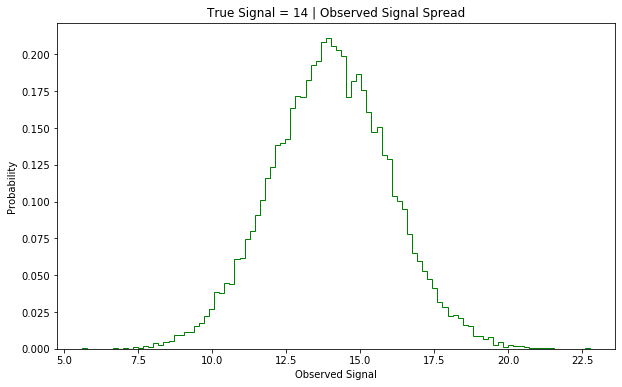

In [34]:
table = pd.DataFrame(columns = ['Background', 'Signal', 'Data'])
table['Data'] = data
table['Signal'] = signal
table['Background'] = bkgd

injected14 = table.query(f'13.8 < Signal < 14.2')
plt.hist(injected14['Data'], bins =100, density = True, color='green', histtype='step')
plt.xlabel('Observed Signal')
plt.ylabel('Probability')
plt.title('True Signal = 14 | Observed Signal Spread')
plt.show()

This plot shows the distribution of the data (along with the background) after injecting a signal of 14. The plot is a slice horizontally of the 2D histogram above with 14 being the true signal value (y-axis). Looking at Baye's theorem, the normalization factor of P(data), which is the background distribution is normal, so P(signal|data) is proportional to P(signal|data). That means they will have the same graph normalized. 

### 1C)

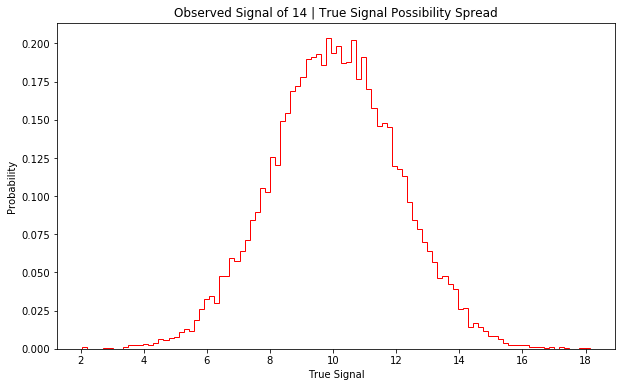

In [42]:
observed14 = table.query(f'13.8 < Data < 14.2')
plt.hist(observed14['Signal'], bins =100, density = True, color = 'r', histtype='step')
plt.xlabel('True Signal')
plt.ylabel('Probability')
plt.title('Observed Signal of 14 | True Signal Possibility Spread')
plt.show()


This plot explains the values of true signals if we were reading 14. Image this plot is a slice vertically of the 2D histogram plotted at the very beginning with 14 being the observed data (y-axis).

## Problem 2


Repeat problem 1 but have a background with a non-zero mean. I'm goign to have the background centered at 4. I'm going to keep the same sigma value and random strength interval, 2 and 20.

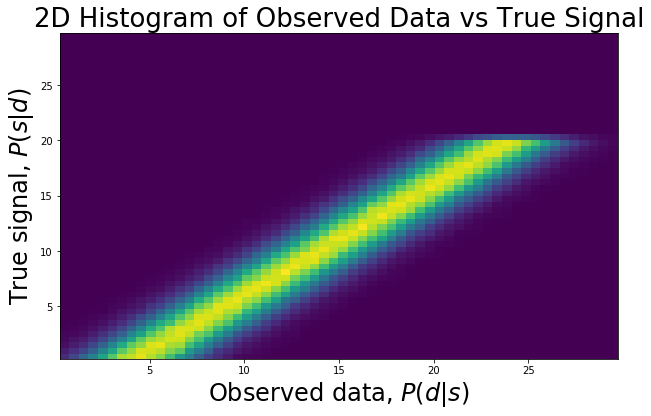

Sigma = 2
Signals of random strengh on the interval of 20
Centered at 4


In [36]:
x = np.linspace(-20,20,40)
bkgd = stats.norm.rvs(loc=4,scale=2, size = 1000000)
signal = stats.uniform.rvs(loc=0,scale=20, size = 1000000)
data = bkgd + signal
signaledges = np.linspace(0,30,60)
dataedges = np.linspace(0,30,60)
Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.title("2D Histogram of Observed Data vs True Signal", fontsize = 26)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

print("Sigma = 2")
print("Signals of random strengh on the interval of 20")
print("Centered at 4")

Injecting a signal of 14 with an uncertainty of 0.2

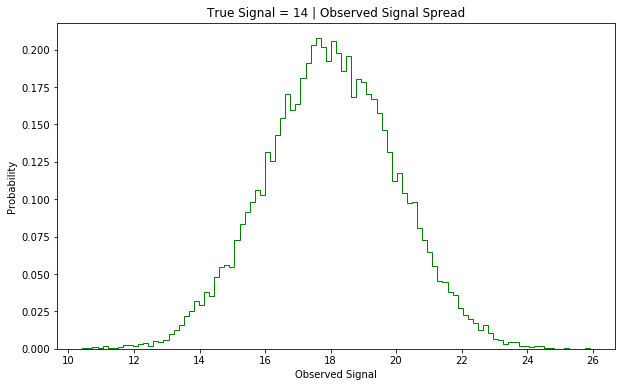

In [37]:
table = pd.DataFrame(columns = ['Background', 'Signal', 'Data'])
table['Data'] = data
table['Signal'] = signal
table['Background'] = bkgd

injected14 = table.query(f'13.8 < Signal < 14.2')
plt.hist(injected14['Data'], bins =100, density = True, color='green', histtype='step')
plt.xlabel('Observed Signal')
plt.ylabel('Probability')
plt.title('True Signal = 14 | Observed Signal Spread')
plt.show()


Above, this means that for any injected true signal equal to 14 relates to seeing a observed signal shown above, which is centered at 18 with a sigma = 2 spread (kept same from above).

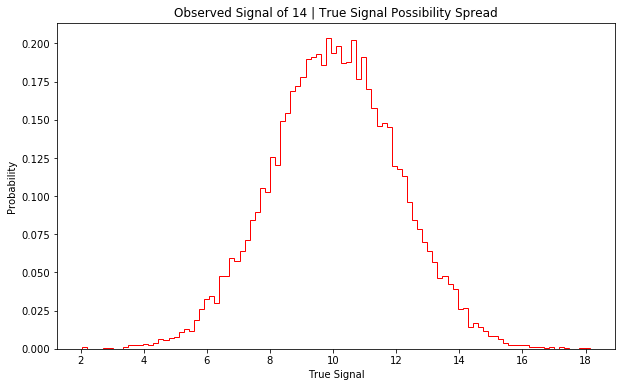

In [38]:
observed14 = table.query(f'13.8 < Data < 14.2')
plt.hist(observed14['Signal'], bins =100, density = True, color = 'r', histtype='step')
plt.xlabel('True Signal')
plt.ylabel('Probability')
plt.title('Observed Signal of 14 | True Signal Possibility Spread')
plt.show()


Above, this means that if we notice the observed value is 14, we can correspond the true value probablities from above. The least likely being the edge cases and the most likely being 10.

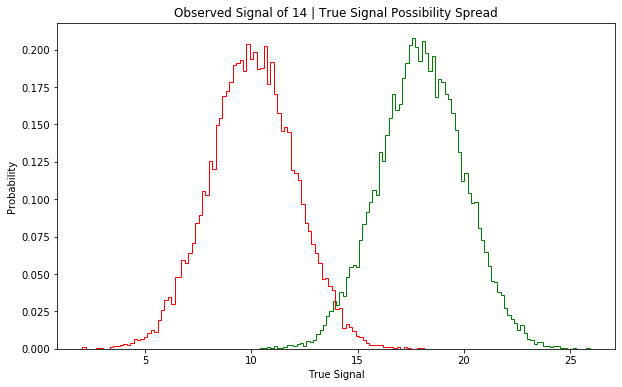

In [39]:
plt.hist(injected14['Data'], bins =100, density = True, histtype='step', color='green')
plt.hist(observed14['Signal'], bins =100, density = True, histtype='step', color='red')
plt.xlabel('True Signal')
plt.ylabel('Probability')
plt.title('Observed Signal of 14 | True Signal Possibility Spread')
plt.show()


Above, we can see the two graphs aren't the same as in problem one. This is because they don't have the same center since the background distirbution average has changed. Now you can see that when we inject a true signal value of 14, they both are offset by four in either direction, which is equal to the average of the background. -4 for observed signal to yield spread of true signal values and +4 for true signal to yield the spread of observed signal.